In [1]:
import pandas as pd
import numpy as np

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from  scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import bartlett

## Load dataframe

In [2]:
df_cane = pd.read_excel('./data/cane_result_20230426.xlsx')

In [3]:
## 각 집단 전/후의 기초통계량

df_cane.describe().T

,count,mean,std,min,25%,50%,75%,max
pre-prof,60.0,22.670833,1.874360,17.375,21.37500,22.7500,24.00000,26.875
post-prof,60.0,23.341667,1.890524,18.625,21.93750,23.5000,24.62500,27.625
pre-fel,60.0,22.075000,1.931178,17.000,20.50000,22.2500,23.31250,26.000
post-fel,60.0,22.679167,1.980889,17.500,21.00000,22.7500,24.00000,27.000
pre-resi,60.0,23.708333,1.652660,19.625,22.75000,23.6250,25.03125,27.000
post-resi,60.0,23.091667,1.648199,18.500,22.09375,22.9375,24.28125,26.625
algorithm,60.0,22.716667,2.401212,17.000,21.00000,23.0000,24.00000,29.000


In [4]:
df_cane.head()

,pre-prof,post-prof,pre-fel,post-fel,pre-resi,post-resi,algorithm
0,22.500,22.875,22.00,23.00,24.625,23.250,20
1,26.000,26.625,23.25,24.50,25.375,24.375,23
2,21.375,21.250,20.50,20.50,22.000,21.500,21
3,21.500,21.125,19.25,20.50,22.000,21.875,23
4,21.875,22.000,19.75,20.25,23.500,22.875,22


## 0. CANE 노출 전, 각 집단과 알고리즘의 평균 비교
- 박스플롯 비교
- professor : algorithm의 평균이 더 높다
- fellow : algorithm의 평균이 더 높다
- resident : algorithm의 평균이 더 낮다

In [5]:
# 정규성 확인 
# shapiro 귀무가설 : 해당 집단은 정규성을 만족한다
# p-val > 0.05이므로, 귀무가설을 기각할수 없다 : 정규성 만족함

print(shapiro(df_cane['pre-prof']))
print(shapiro(df_cane['pre-fel']))
print(shapiro(df_cane['pre-resi']))
print(shapiro(df_cane['algorithm']))

ShapiroResult(statistic=0.991999626159668, pvalue=0.9636600017547607)
ShapiroResult(statistic=0.9868534207344055, pvalue=0.7655475735664368)
ShapiroResult(statistic=0.9793611764907837, pvalue=0.4021151661872864)
ShapiroResult(statistic=0.9803139567375183, pvalue=0.44196218252182007)


### 0-1. pre professor & algorithm

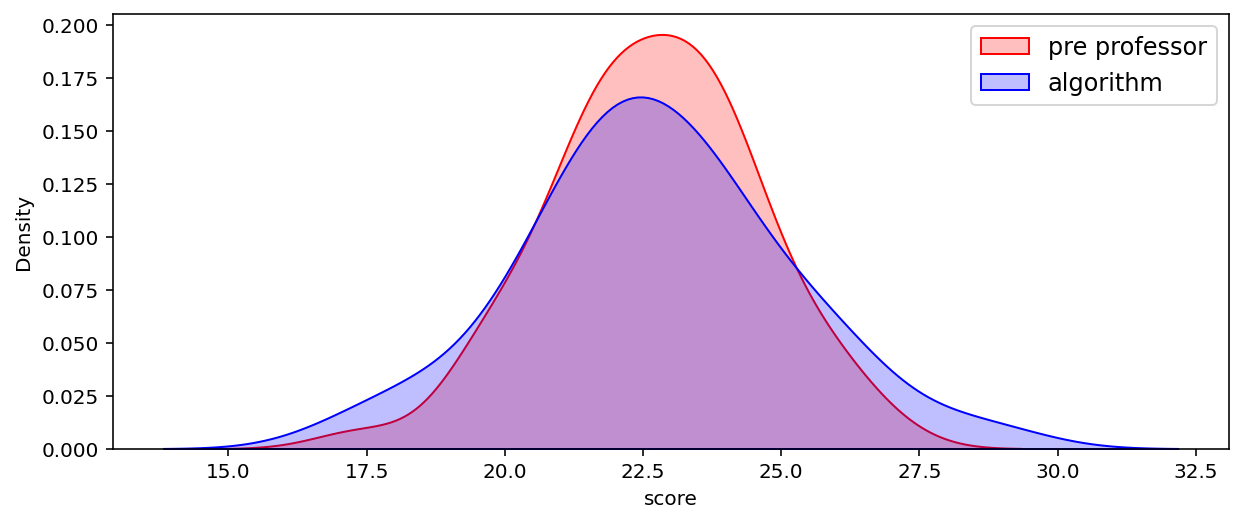

In [6]:
# professor vs algorithm

plt.figure(figsize=(10, 4))

sns.kdeplot(df_cane['pre-prof'], color='red', shade=True, label='pre professor')
sns.kdeplot(df_cane['algorithm'], color='blue', shade=True, label='algorithm')
plt.legend(loc='upper right', fontsize=12)
plt.xlabel('score')
plt.show()

In [7]:
#등분산성 확인 - 레빈 검증
# p-val > 0.05이므로, 귀무가설을 기각할수 없다 : 등분산성 만족함

print(levene(df_cane['pre-prof'], df_cane['algorithm']))

#등분산성 확인 - 바틀렛 검증
# p-val > 0.05이므로, 귀무가설을 기각할수 없다 : 등분산성 만족함

print(bartlett(df_cane['pre-prof'], df_cane['algorithm']))

LeveneResult(statistic=2.210665866710536, pvalue=0.13972667811736744)
BartlettResult(statistic=3.55361233743088, pvalue=0.0594159683012891)


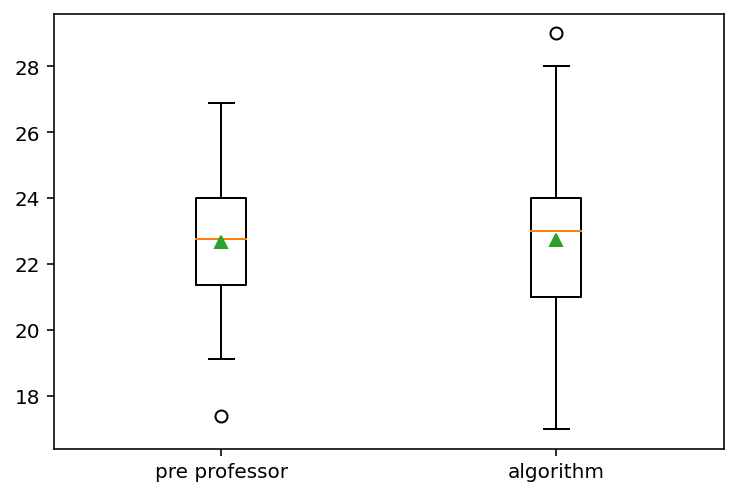

pre professor 점수 평균:  22.6708
algorithm 점수 평균:  22.7167


In [8]:
# professor vs algorithm

plt.boxplot([df_cane['pre-prof'], df_cane['algorithm']], showmeans=True)
plt.xticks([1, 2], ['pre professor', 'algorithm'])
plt.show()
print('pre professor 점수 평균: ', np.round(df_cane['pre-prof'].mean(), 4))
print('algorithm 점수 평균: ', np.round(df_cane['algorithm'].mean(), 4))

In [9]:
# "algorithm 의 평균이 더 크다" 라는 가설 검정 (p-value > 0.05 : 기각)
# "algorithm 의 평균이 더 작다" 라는 가설 검정 (p-value > 0.05 : 기각)
# 두 집단의 평균은 거의 같다 

stat, p_val = stats.ttest_ind(df_cane['pre-prof'], df_cane['algorithm'], alternative='less')
print('statistic:', stat, '   p-value:', p_val)

statistic: -0.11654817385826353    p-value: 0.4537081180730045


### 0-2. pre fellow & algorithm

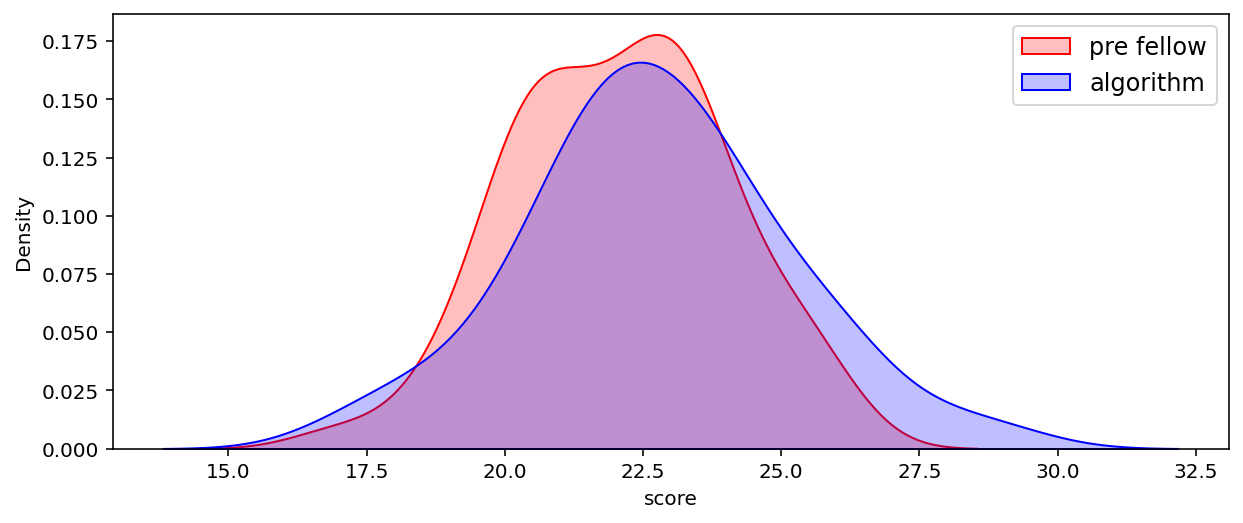

In [10]:
# professor vs algorithm

plt.figure(figsize=(10, 4))

sns.kdeplot(df_cane['pre-fel'], color='red', shade=True, label='pre fellow')
sns.kdeplot(df_cane['algorithm'], color='blue', shade=True, label='algorithm')
plt.legend(loc='upper right', fontsize=12)
plt.xlabel('score')
plt.show()

In [11]:
#등분산성 확인 - 레빈 검증
# p-val > 0.05이므로, 귀무가설을 기각할수 없다 : 등분산성 만족함

print(levene(df_cane['pre-fel'], df_cane['algorithm']))

#등분산성 확인 - 바틀렛 검증
# p-val > 0.05이므로, 귀무가설을 기각할수 없다 : 등분산성 만족함

print(bartlett(df_cane['pre-fel'], df_cane['algorithm']))

LeveneResult(statistic=1.1275529481952884, pvalue=0.29046633359176444)
BartlettResult(statistic=2.7546742561126125, pvalue=0.09697056493955172)


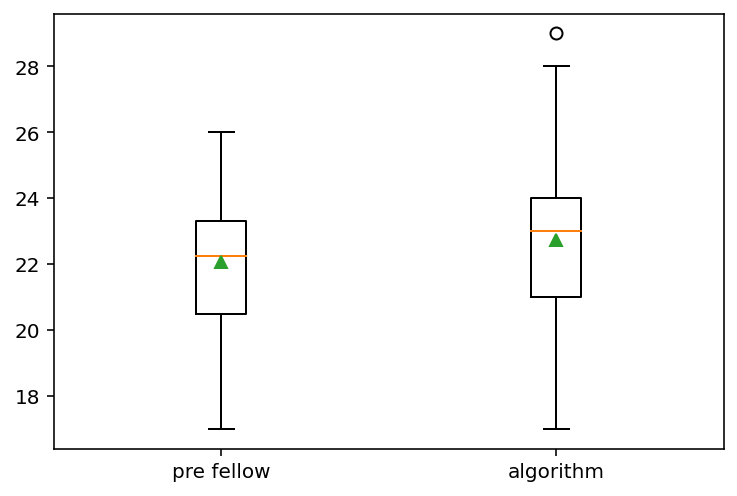

pre fellow 점수 평균:  22.075
algorithm 점수 평균:  22.7167


In [12]:
# fellow vs algorithm

plt.boxplot([df_cane['pre-fel'], df_cane['algorithm']], showmeans=True)
plt.xticks([1, 2], ['pre fellow', 'algorithm'])
plt.show()
print('pre fellow 점수 평균: ', np.round(df_cane['pre-fel'].mean(), 4))
print('algorithm 점수 평균: ', np.round(df_cane['algorithm'].mean(), 4))

In [13]:
# "algorithm 의 평균이 더 크다" 라는 가설 검정 (p-value > 0.05 : 기각)
# "algorithm 의 평균이 더 작다" 라는 가설 검정 (p-value > 0.05 : 기각)
# 두 집단의 평균은 거의 같다 

stat, p_val = stats.ttest_ind(df_cane['pre-prof'], df_cane['algorithm'], alternative='less')
print('statistic:', stat, '   p-value:', p_val)

statistic: -0.11654817385826353    p-value: 0.4537081180730045


### 0-3. pre resident & algorithm

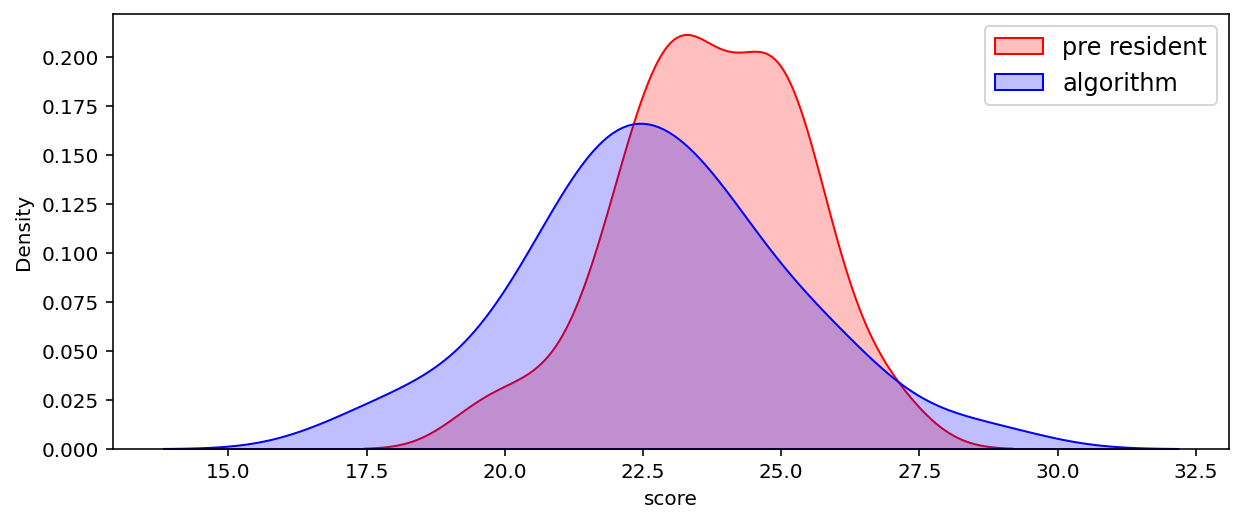

In [14]:
# professor vs algorithm

plt.figure(figsize=(10, 4))

sns.kdeplot(df_cane['pre-resi'], color='red', shade=True, label='pre resident')
sns.kdeplot(df_cane['algorithm'], color='blue', shade=True, label='algorithm')
plt.legend(loc='upper right', fontsize=12)
plt.xlabel('score')
plt.show()

In [15]:
#등분산성 확인 - 레빈 검증
# p-val > 0.05이므로, 귀무가설을 기각할수 없다 : 등분산성 만족함

print(levene(df_cane['pre-resi'], df_cane['algorithm']))

#등분산성 확인 - 바틀렛 검증
# p-val > 0.05이므로, 귀무가설을 기각할수 없다 : 등분산성 만족함

print(bartlett(df_cane['pre-resi'], df_cane['algorithm']))

LeveneResult(statistic=4.919211538769392, pvalue=0.028474112110754422)
BartlettResult(statistic=7.982138237580216, pvalue=0.004724111184403373)


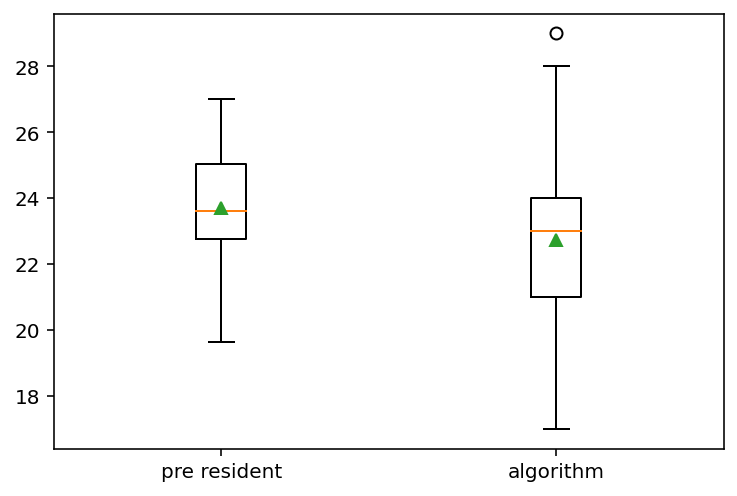

pre resident 점수 평균:  23.7083
algorithm 점수 평균:  22.7167


In [16]:
# fellow vs algorithm

plt.boxplot([df_cane['pre-resi'], df_cane['algorithm']], showmeans=True)
plt.xticks([1, 2], ['pre resident', 'algorithm'])
plt.show()
print('pre resident 점수 평균: ', np.round(df_cane['pre-resi'].mean(), 4))
print('algorithm 점수 평균: ', np.round(df_cane['algorithm'].mean(), 4))

In [17]:
# "resident의 평균이 더 크다" 라는 가설 검정 (p-value < 0.00 : 유의함)
#  resident의 평균 점수가 더 높다

stat, p_val = stats.ttest_ind(df_cane['pre-resi'], df_cane['algorithm'], alternative='greater')
print('statistic:', stat, '   p-value:', p_val)

statistic: 2.635153148230406    p-value: 0.004769565028619299


## 1. 각 개별 그룹에서, cane노출 전/후 점수 차이에 대한 유의성 분석
- paired t-test 수행 (독립표본이 아님)
- "cane에 노출되는 것이 효과가 있다"는 것을 검정
- 효과의 방향 => alternative='less'로 설정: 첫번째 파라미터로 들어오는 인자의 평균이 더 작다
- ‘less’: the mean of the distribution underlying the first sample is less than the mean of the distribution underlying the second sample.

### 1-1. professor

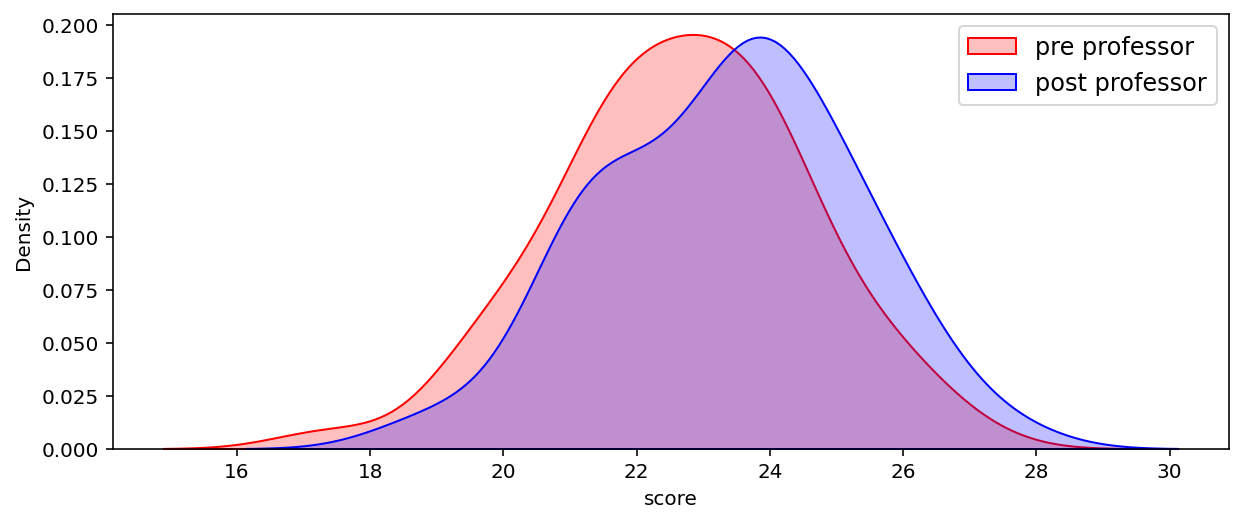

In [18]:
plt.figure(figsize=(10, 4))

sns.kdeplot(df_cane['pre-prof'], color='red', shade=True, label='pre professor')
sns.kdeplot(df_cane['post-prof'], color='blue', shade=True, label='post professor')
plt.legend(loc='upper right', fontsize=12)
plt.xlabel('score')
plt.show()

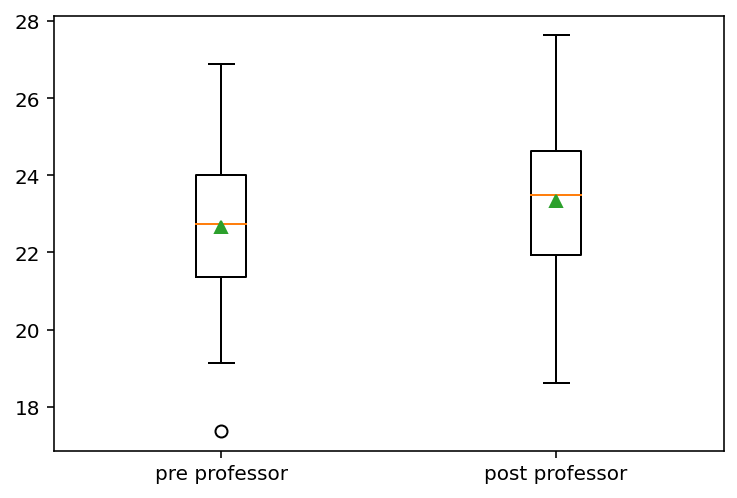

pre professor 점수 평균:  22.6708
post professor 점수 평균:  23.3417


In [19]:
plt.boxplot([df_cane['pre-prof'], df_cane['post-prof']], showmeans=True)
plt.xticks([1, 2], ['pre professor', 'post professor'])
plt.show()
print('pre professor 점수 평균: ', np.round(df_cane['pre-prof'].mean(), 4))
print('post professor 점수 평균: ', np.round(df_cane['post-prof'].mean(), 4))

In [20]:
# "post의 평균이 더 크다" 라는 가설 검정 (p-value < 0.0000 : 유의함)
# professor그룹: 알고리즘 노출 이후 평균이 더 증가했으며, paired t-test 결과 이 증가는 유의함
# (professor그룹은 알고리즘의 평균 점수가 더 높은 그룹임)

stat, p_val = stats.ttest_rel(df_cane['pre-prof'], df_cane['post-prof'], alternative='less')
print('statistic:', stat, '   p-value:', p_val)

statistic: -11.110503880233214    p-value: 2.1478017485587334e-16


### 1-2. fellow

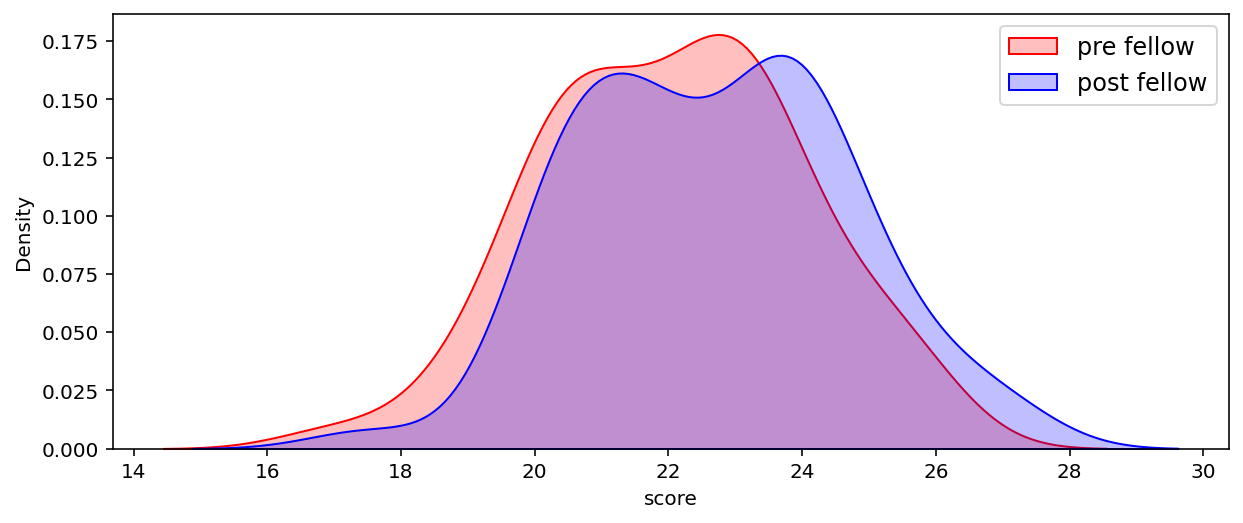

In [21]:
plt.figure(figsize=(10, 4))

sns.kdeplot(df_cane['pre-fel'], color='red', shade=True, label='pre fellow')
sns.kdeplot(df_cane['post-fel'], color='blue', shade=True, label='post fellow')
plt.legend(loc='upper right', fontsize=12)
plt.xlabel('score')
plt.show()

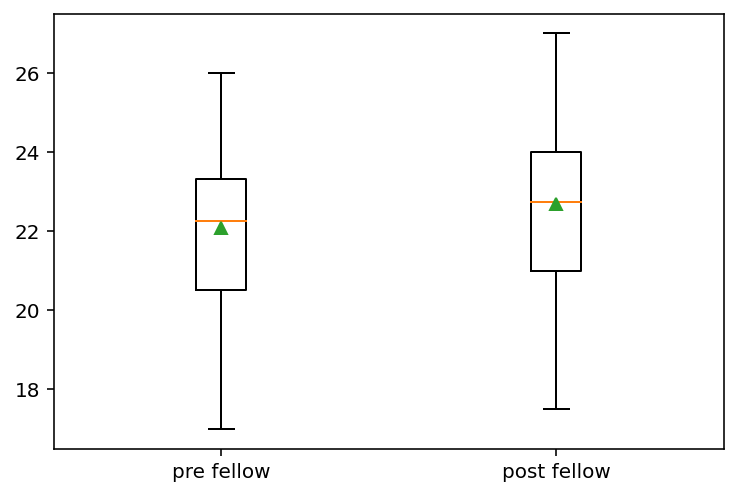

pre fellow 점수 평균:  22.075
post fellow 점수 평균:  22.6792


In [22]:
plt.boxplot([df_cane['pre-fel'], df_cane['post-fel']], showmeans=True)
plt.xticks([1, 2], ['pre fellow', 'post fellow'])
plt.show()
print('pre fellow 점수 평균: ', np.round(df_cane['pre-fel'].mean(), 4))
print('post fellow 점수 평균: ', np.round(df_cane['post-fel'].mean(), 4))

In [23]:
# "post의 평균이 더 크다" 라는 가설 검정 (p-value < 0.0000 : 유의함)
# fellow 그룹 : 알고리즘 노출 이후 평균이 더 증가했으며, paired t-test 결과 이 증가는 유의함
# (fellow 그룹은 알고리즘의 평균 점수가 더 높은 그룹임)

stat, p_val = stats.ttest_rel(df_cane['pre-fel'], df_cane['post-fel'], alternative='less')
print('statistic:', stat, '   p-value:', p_val)

statistic: -6.230524342177768    p-value: 2.671085708729617e-08


### 1-3. resident

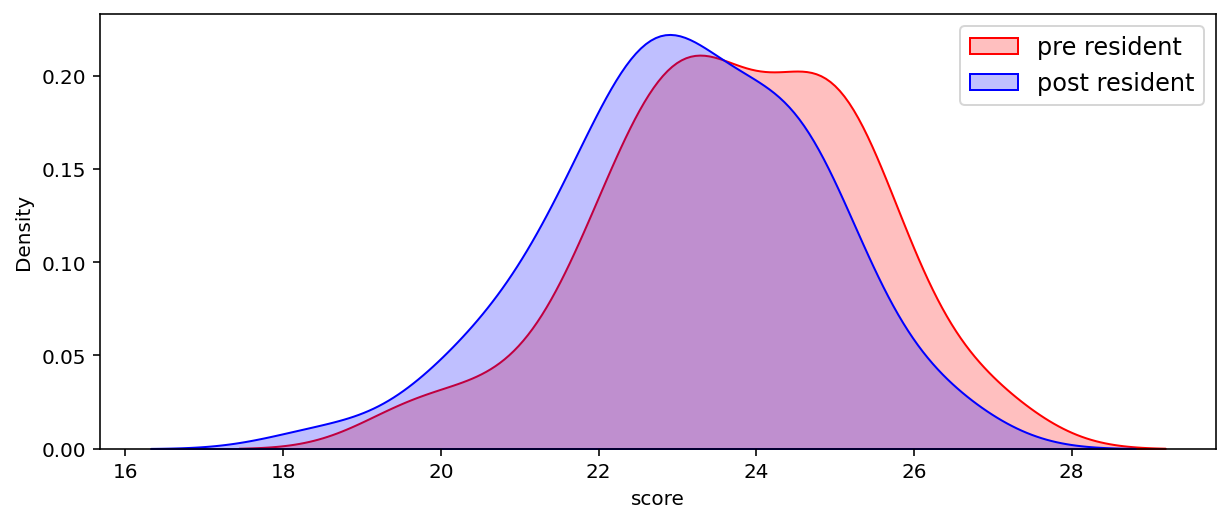

In [24]:
plt.figure(figsize=(10, 4))

sns.kdeplot(df_cane['pre-resi'], color='red', shade=True, label='pre resident')
sns.kdeplot(df_cane['post-resi'], color='blue', shade=True, label='post resident')
plt.legend(loc='upper right', fontsize=12)
plt.xlabel('score')
plt.show()

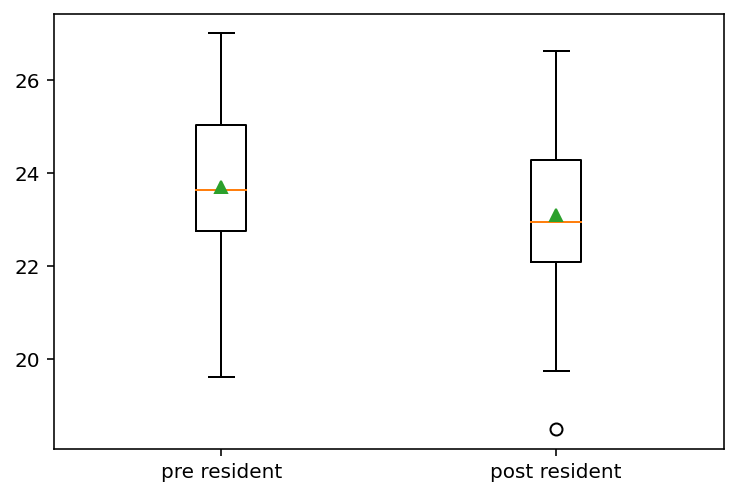

pre resident 점수 평균:  23.7083
post resident 점수 평균:  23.0917


In [25]:
plt.boxplot([df_cane['pre-resi'], df_cane['post-resi']], showmeans=True)
plt.xticks([1, 2], ['pre resident', 'post resident'])
plt.show()
print('pre resident 점수 평균: ', np.round(df_cane['pre-resi'].mean(), 4))
print('post resident 점수 평균: ', np.round(df_cane['post-resi'].mean(), 4))

In [26]:
# "pre의 평균이 더 크다" 라는 가설 검정 (p-value < 0.0000 : 유의함)
# resident 그룹 : 알고리즘 노출 이후 평균이 더 감소했으며, paired t-test 결과 이 증가는 유의함
# (resident 그룹은 알고리즘의 평균 점수가 더 낮은 그룹임)

stat, p_val = stats.ttest_rel(df_cane['pre-resi'], df_cane['post-resi'], alternative='greater') 
print('statistic:', stat, '   p-value:', p_val)

statistic: 10.057505289519682    p-value: 1.03675739523387e-14


## 2. cane 노출 전, 3개 그룹들의 점수 차이에 대한 유의성 분석
- anova

In [27]:
# 정규성 확인 
# shapiro 귀무가설 : 해당 집단은 정규성을 만족한다
# p-val > 0.05이므로, 귀무가설을 기각할수 없다 : 정규성 만족함

print(shapiro(df_cane['pre-prof']))
print(shapiro(df_cane['pre-fel']))
print(shapiro(df_cane['pre-resi']))

ShapiroResult(statistic=0.991999626159668, pvalue=0.9636600017547607)
ShapiroResult(statistic=0.9868534207344055, pvalue=0.7655475735664368)
ShapiroResult(statistic=0.9793611764907837, pvalue=0.4021151661872864)


In [28]:
#등분산성 확인 - 레빈 검증
# p-val > 0.05이므로, 귀무가설을 기각할수 없다 : 등분산성 만족함

print(levene(df_cane['pre-prof'], df_cane['pre-fel'], df_cane['pre-resi']))

#등분산성 확인 - 바틀렛 검증
# p-val > 0.05이므로, 귀무가설을 기각할수 없다 : 등분산성 만족함

print(bartlett(df_cane['pre-prof'], df_cane['pre-fel'], df_cane['pre-resi']))

LeveneResult(statistic=0.9191002388242179, pvalue=0.40077285656423667)
BartlettResult(statistic=1.5534952926210899, pvalue=0.45989933688249396)


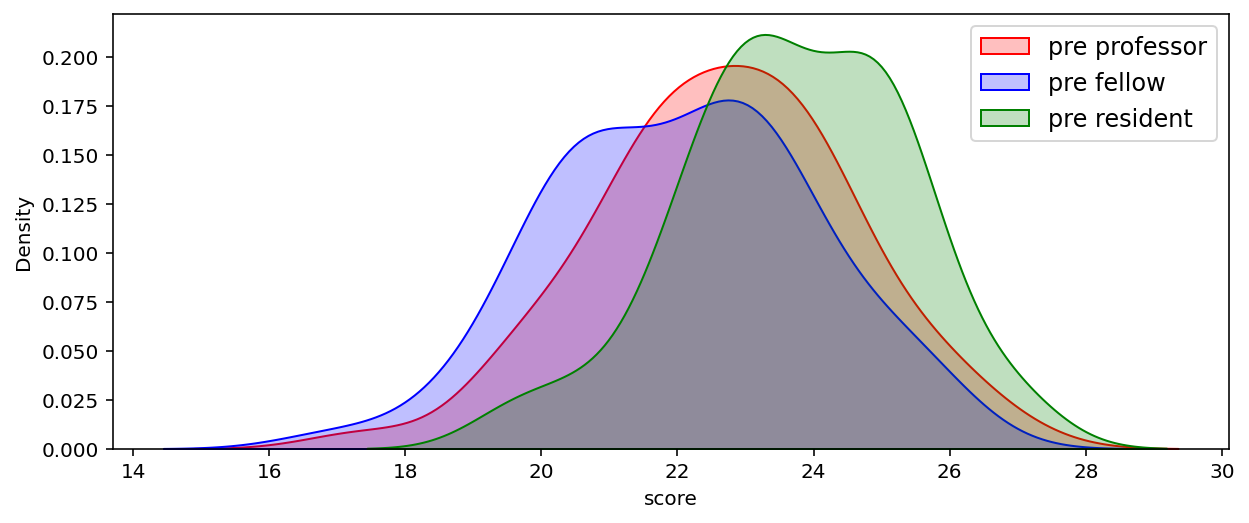

In [29]:
plt.figure(figsize=(10, 4))

sns.kdeplot(df_cane['pre-prof'], color='red', shade=True, label='pre professor')
sns.kdeplot(df_cane['pre-fel'], color='blue', shade=True, label='pre fellow')
sns.kdeplot(df_cane['pre-resi'], color='green', shade=True, label='pre resident')
plt.legend(loc='upper right', fontsize=12)
plt.xlabel('score')
plt.show()

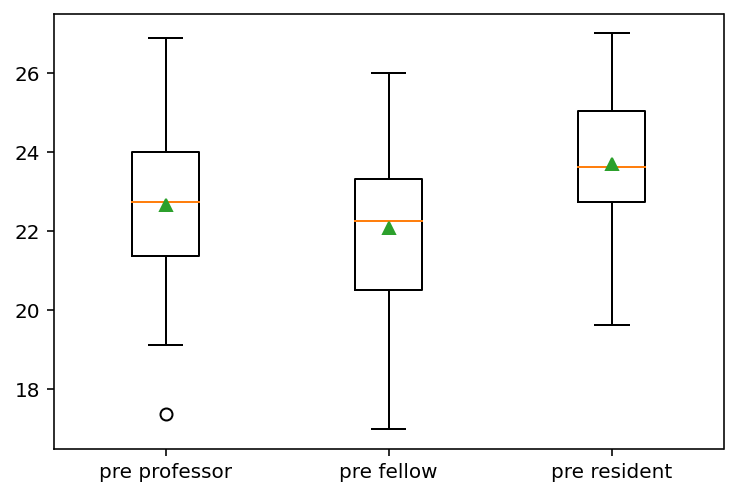

pre professor 점수 평균:  22.6708
pre fellow 점수 평균:  22.075
pre resident 점수 평균:  23.7083


In [30]:
plt.boxplot([df_cane['pre-prof'], df_cane['pre-fel'], df_cane['pre-resi']], showmeans=True)
plt.xticks([1, 2, 3], ['pre professor', 'pre fellow', 'pre resident'])
plt.show()
print('pre professor 점수 평균: ', np.round(df_cane['pre-prof'].mean(), 4))
print('pre fellow 점수 평균: ', np.round(df_cane['pre-fel'].mean(), 4))
print('pre resident 점수 평균: ', np.round(df_cane['pre-resi'].mean(), 4))

In [31]:
# cane노출 이후 세 집단간의 평균
# 귀무가설 : 세 집단의 평균은 동일하다
# p-val < 0.05이므로, 귀무가설을 기각한다 -> 즉 각 집단의 평균에 차이가 난다
# cane 노출 전에는 세 집단이 실력에 차이가 존재한다

f_statistic, p_val = stats.f_oneway(df_cane['pre-prof'], df_cane['pre-fel'], df_cane['pre-resi'])
print('statistic:', f_statistic, '   p-value:', p_val)

statistic: 12.329712793733682    p-value: 9.702743260984299e-06


## 3. cane 노출 후, 3개 그룹들의 점수 차이에 대한 유의성 분석
- anova

In [32]:
# 정규성 확인 
# shapiro 귀무가설 : 해당 집단은 정규성을 만족한다
# p-val > 0.05이므로, 귀무가설을 기각할수 없다 : 정규성 만족함

print(shapiro(df_cane['post-prof']))
print(shapiro(df_cane['post-fel']))
print(shapiro(df_cane['post-resi']))

ShapiroResult(statistic=0.9883221983909607, pvalue=0.8363660573959351)
ShapiroResult(statistic=0.9772762656211853, pvalue=0.3244442641735077)
ShapiroResult(statistic=0.9885128736495972, pvalue=0.8449729681015015)


In [33]:
#등분산성 확인 - 레빈 검증
# p-val > 0.05이므로, 귀무가설을 기각할수 없다 : 등분산성 만족함

print(levene(df_cane['post-prof'], df_cane['post-fel'], df_cane['post-resi']))

#등분산성 확인 - 바틀렛 검증
# p-val > 0.05이므로, 귀무가설을 기각할수 없다 : 등분산성 만족함

print(bartlett(df_cane['post-prof'], df_cane['post-fel'], df_cane['post-resi']))

LeveneResult(statistic=1.8303960179979837, pvalue=0.16337215864794655)
BartlettResult(statistic=2.0753474579567692, pvalue=0.35427787045141673)


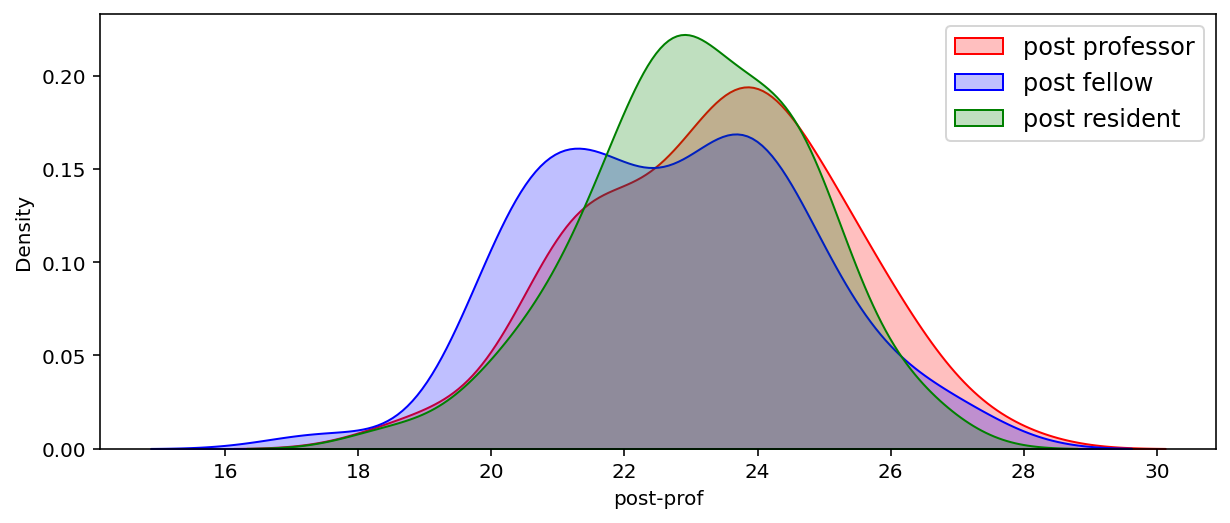

In [34]:
plt.figure(figsize=(10, 4))

sns.kdeplot(df_cane['post-prof'], color='red', shade=True, label='post professor')
sns.kdeplot(df_cane['post-fel'], color='blue', shade=True, label='post fellow')
sns.kdeplot(df_cane['post-resi'], color='green', shade=True, label='post resident')
plt.legend(loc='upper right', fontsize=12)
plt.show()

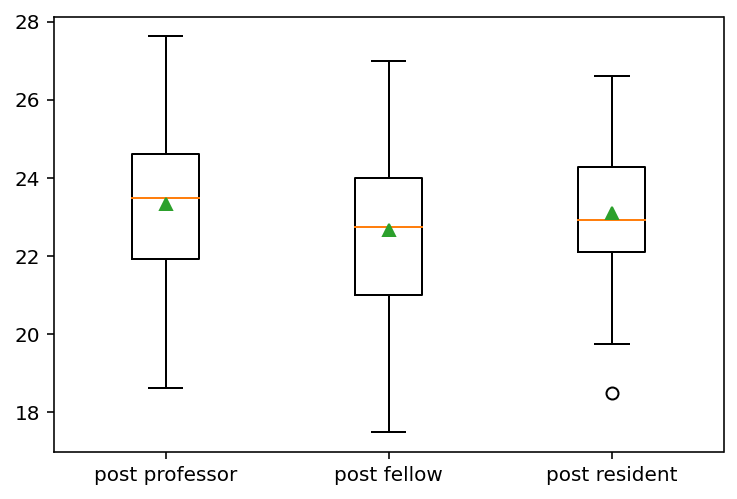

post professor 점수 평균:  23.3417
post fellow 점수 평균:  22.6792
post resident 점수 평균:  23.0917


In [35]:
plt.boxplot([df_cane['post-prof'], df_cane['post-fel'], df_cane['post-resi']], showmeans=True)
plt.xticks([1, 2, 3], ['post professor', 'post fellow', 'post resident'])
plt.show()
print('post professor 점수 평균: ', np.round(df_cane['post-prof'].mean(), 4))
print('post fellow 점수 평균: ', np.round(df_cane['post-fel'].mean(), 4))
print('post resident 점수 평균: ', np.round(df_cane['post-resi'].mean(), 4))

In [36]:
# cane노출 이후 세 집단간의 평균
# 귀무가설 : 세 집단의 평균은 동일하다
# p-val > 0.05이므로, 귀무가설을 기각할수 없다 -> 즉 각 집단의 평균이 동일하다 
# cane 노출 이후에는 세 집단이 실력에 차이가 거의 없다

f_statistic, p_val = stats.f_oneway(df_cane['post-prof'], df_cane['post-fel'], df_cane['post-resi'])
print('statistic:', f_statistic, '   p-value:', p_val)

statistic: 1.9723672679944617    p-value: 0.14217312922540504


## cane 노출 전, 서로 다른 2개 그룹의 점수 차이에 대한 유의성 분석
- t-test
- pre professer와 pre resident 비교
- pre fellow와 pre resident 비교

## cane 노출 후, 서로 다른 2개 그룹의 점수 차이에 대한 유의성 분석
- t-test
- post professer와 post resident 비교
- post fellow와 post resident 비교